In [1]:
!unzip /content/archive.zip -d /content/data

Archive:  /content/archive.zip
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


# **Airline Passenger Satisfaction Classifier - ANN**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## **Data Collection & Processing**

### **Training Data**

In [4]:
df_train = pd.read_csv("/content/data/train.csv")

In [5]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
id,70172,5047,110028,24026,119299,111157,82113,96462,79485,65725,...,86549,66030,71445,102203,60666,94171,73097,68825,54173,62567
Gender,Male,Male,Female,Female,Male,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Male,Female,Male,Male,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,...,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,13,25,26,25,61,26,47,52,41,20,...,26,24,57,60,50,23,49,30,22,27
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business,Eco,Eco,Business,Business,Eco,...,Business,Eco,Eco,Business,Eco,Eco,Business,Business,Eco,Business
Flight Distance,460,235,1142,562,214,1180,1276,2035,853,1061,...,712,1055,867,1599,1620,192,2347,1995,1000,1723
Inflight wifi service,3,3,2,2,3,3,2,4,1,3,...,4,1,4,5,3,2,4,1,1,1
Departure/Arrival time convenient,4,2,2,5,3,4,4,3,2,3,...,4,1,5,5,1,1,4,1,1,3


In [6]:
df_train["Male"] = df_train["Gender"] == "Male"

In [7]:
df_train["Satisfied"] = df_train["satisfaction"] == "satisfied"

In [8]:
df_train[["Male", "Satisfied"]]

,Male,Satisfied
0,True,False
1,True,False
2,False,True
3,False,False
4,True,True
...,...,...
103899,False,False
103900,True,True
103901,True,False
103902,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Satisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Satisfied'].value_counts()
    for x_label, grp in _df_2.groupby('Male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Male')
_ = plt.ylabel('Satisfied')

In [9]:
df_train["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [10]:
print((df_train["Class"] == "Eco Plus").sum())
print((df_train["Class"] == "Eco").sum())

7494
46745


In [11]:
df_train["Business Class"] = df_train["Class"] == "Business"
df_train["Economy Class"] = df_train["Class"] != "Business"

In [12]:
print((df_train["Business Class"]).sum() == (df_train["Class"] == "Business").sum())
print((df_train["Economy Class"]).sum() == (df_train["Class"] != "Business").sum())

True
True


In [13]:
df_train[["Business Class", "Economy Class"]]

,Business Class,Economy Class
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
103899,False,True
103900,True,False
103901,True,False
103902,False,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Business Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Economy Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Economy Class'].value_counts()
    for x_label, grp in _df_5.groupby('Business Class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Business Class')
_ = plt.ylabel('Economy Class')

In [14]:
df_train["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
df_train["Loyal Customer"] = df_train["Customer Type"] == "Loyal Customer"

In [16]:
df_train["Loyal Customer"].head()

0     True
1    False
2     True
3     True
4     True
Name: Loyal Customer, dtype: bool

In [17]:
df_train["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [18]:
df_train["Personal Travel"] = df_train["Type of Travel"] == "Personal Travel"

In [19]:
df_train["Personal Travel"].head()

0     True
1    False
2    False
3    False
4    False
Name: Personal Travel, dtype: bool

In [20]:
df_train_modified = df_train.drop(
    [
        "Type of Travel",
        "Customer Type",
        "Class",
        "satisfaction",
        "Gender",
        "Unnamed: 0",
        "id"
    ],
    axis = 1
)

In [21]:
df_train_modified.head().T

,0,1,2,3,4
Age,13,25,26,25,61
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3
Food and drink,5,1,5,2,4
Online boarding,3,3,5,2,5
Seat comfort,5,1,5,2,5
Inflight entertainment,5,1,5,2,3


In [28]:
#df_train_modified

In [40]:
# Correlation Matrix
cm = df_train_modified.corr()
cm["Satisfied"].sort_values(ascending = True)

Economy Class                       -0.503848
Personal Travel                     -0.449000
Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.050494
Gate location                        0.000682
Male                                 0.012211
Age                                  0.137167
Ease of Online booking               0.171705
Loyal Customer                       0.187638
Food and drink                       0.209936
Checkin service                      0.236174
Inflight service                     0.244741
Baggage handling                     0.247749
Inflight wifi service                0.284245
Flight Distance                      0.298780
Cleanliness                          0.305198
Leg room service                     0.313131
On-board service                     0.322383
Seat comfort                         0.349459
Inflight entertainment               0.398059
Online boarding                   

In [29]:
plot_data = df_train_modified.sort_values(by = "Satisfied", ascending = True)

In [30]:
plot_data.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'Satisfied', 'Business Class', 'Economy Class',
       'Loyal Customer', 'Personal Travel'],
      dtype='object')

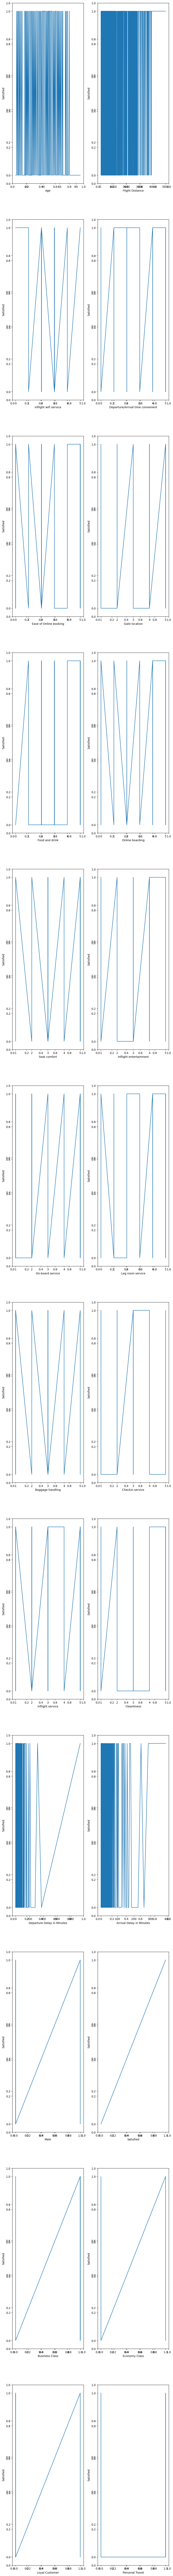

In [39]:
fig, axs = plt.subplots(12, 2, figsize = (10, 165))

i : int = 0

while i < 24:
  fig.add_subplot(12, 2, i + 1)

  plt.plot(
      [j[1] for j in enumerate(
          plot_data.sort_values(by = plot_data.columns[i], ascending = True)[plot_data.columns[i]]
          ) if (j[0] + 1) % 100 == 0
      ],

      [j[1] for j in enumerate(
          plot_data.sort_values(by = plot_data.columns[i], ascending = True)["Satisfied"]
          ) if (j[0] + 1) % 100 == 0
      ]
  )

  plt.ylabel("Satisfied")
  plt.xlabel(plot_data.columns[i])

  i += 1

### **Testing Data**

In [50]:
df_test = pd.read_csv("/content/data/test.csv")

In [51]:
df_test.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,19556,90035,12360,77959,36875
Gender,Female,Female,Male,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182
Inflight wifi service,5,1,2,0,2
Departure/Arrival time convenient,4,1,0,0,3


In [52]:
df_test["Male"] = df_test["Gender"] == "Male"
df_test["Satisfied"] = df_test["satisfaction"] == "satisfied"
df_test["Business Class"] = df_test["Class"] == "Business"
df_test["Economy Class"] = df_test["Class"] != "Business"
df_test["Loyal Customer"] = df_test["Customer Type"] == "Loyal Customer"
df_test["Personal Travel"] = df_test["Type of Travel"] == "Personal Travel"

In [53]:
df_test_modified = df_test.drop(
    [
        "Type of Travel",
        "Customer Type",
        "Class",
        "satisfaction",
        "Gender",
        "Unnamed: 0",
        "id"
    ],
    axis = 1
)

## **Machine Learning**

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [76]:
X_train = torch.FloatTensor(
    df_train_modified.drop(
        [
          "Satisfied",
          "Gate location",
          "Departure Delay in Minutes",
          "Departure/Arrival time convenient",
          "Arrival Delay in Minutes"
      ],
      axis = 1
  ).copy().values.astype(float)
)

y_train = torch.LongTensor(
    df_train_modified["Satisfied"].copy().values
)

train_data = list(zip(X_train, y_train))

In [77]:
X_test = torch.FloatTensor(
    df_test_modified.drop(
        [
          "Satisfied",
          "Gate location",
          "Departure Delay in Minutes",
          "Departure/Arrival time convenient",
          "Arrival Delay in Minutes"
      ],
      axis = 1
  ).copy().values.astype(float)
)

y_test = torch.LongTensor(
    df_test_modified["Satisfied"].copy().values
)

test_data = list(zip(X_test, y_test))

In [78]:
print(train_data[0])
print(test_data[0])

(tensor([ 13., 460.,   3.,   3.,   5.,   3.,   5.,   5.,   4.,   3.,   4.,   4.,
          5.,   5.,   1.,   0.,   1.,   1.,   1.]), tensor(0))
(tensor([ 52., 160.,   5.,   3.,   3.,   4.,   3.,   5.,   5.,   5.,   5.,   2.,
          5.,   5.,   0.,   0.,   1.,   1.,   0.]), tensor(1))


In [79]:
train_loader = DataLoader(
    train_data,
    batch_size = 10,
    shuffle = True
)

test_loader = DataLoader(
    test_data,
    batch_size = 10,
    shuffle = True
)

### **Creating The Model**

In [80]:
class ANN(nn.Module):

  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(19, 124)
    self.fc2 = nn.Linear(124, 84)
    self.fc3 = nn.Linear(84, 62)
    self.fc4 = nn.Linear(62, 32)
    self.fc5 = nn.Linear(32, 2)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = F.relu(self.fc4(X))
    X = self.fc5(X)

    return F.log_softmax(X, dim = 1)

In [81]:
torch.manual_seed(71)

In [100]:
Model = ANN()

In [101]:
Model

ANN(
  (fc1): Linear(in_features=19, out_features=124, bias=True)
  (fc2): Linear(in_features=124, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=62, bias=True)
  (fc4): Linear(in_features=62, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=2, bias=True)
)

In [102]:
if torch.cuda.is_available():
  Model.to("cuda")
  device = "cuda"

else:
  Model.to("cpu")
  device = "cpu"

print(device)

cuda


In [103]:
criterion = nn.CrossEntropyLoss()# Loss Function
optimizer = torch.optim.Adam(Model.parameters(), lr = 0.001)

### **Training The Model**

In [104]:
import time

start_time = time.time()

epochs : int = 5
train_losses : int = []
test_losses : int = []
train_correct : int = []
test_correct : int = []

train_corr : int = 0
test_corr : int = 0

i : int = 1
while i <= epochs:
  train_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    y_pred = Model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]

    batch_corr : int = (predicted == y_train).sum()
    train_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (b + 1) % 1000 == 0:
      print(f"Epoch : {i}, Batch : {b + 1}, Loss : {loss.item()}")

  train_losses.append(loss)
  train_correct.append(train_corr)

  test_corr = 0

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      y_val = Model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)

  print(f"Accuracy : {test_corr / len(test_data)}")

  i += 1
current_time = time.time()
print(f"Time taken to train the model : {current_time - start_time}")

Epoch : 1, Batch : 1000, Loss : 0.5712924003601074
Epoch : 1, Batch : 2000, Loss : 0.5890055894851685
Epoch : 1, Batch : 3000, Loss : 0.28561311960220337
Epoch : 1, Batch : 4000, Loss : 0.31012722849845886
Epoch : 1, Batch : 5000, Loss : 0.12014331668615341
Epoch : 1, Batch : 6000, Loss : 0.4354471266269684
Epoch : 1, Batch : 7000, Loss : 0.2877127528190613
Epoch : 1, Batch : 8000, Loss : 0.2008378505706787
Epoch : 1, Batch : 9000, Loss : 0.29751038551330566
Epoch : 1, Batch : 10000, Loss : 0.4543832242488861
Accuracy : 0.8601785898208618
Epoch : 2, Batch : 1000, Loss : 0.3144378066062927
Epoch : 2, Batch : 2000, Loss : 0.4328129291534424
Epoch : 2, Batch : 3000, Loss : 0.33730393648147583
Epoch : 2, Batch : 4000, Loss : 0.4477904438972473
Epoch : 2, Batch : 5000, Loss : 0.6537374258041382
Epoch : 2, Batch : 6000, Loss : 0.1921214461326599
Epoch : 2, Batch : 7000, Loss : 0.5909931063652039
Epoch : 2, Batch : 8000, Loss : 0.1347983032464981
Epoch : 2, Batch : 9000, Loss : 0.282840281724

### **Model Evaluation**

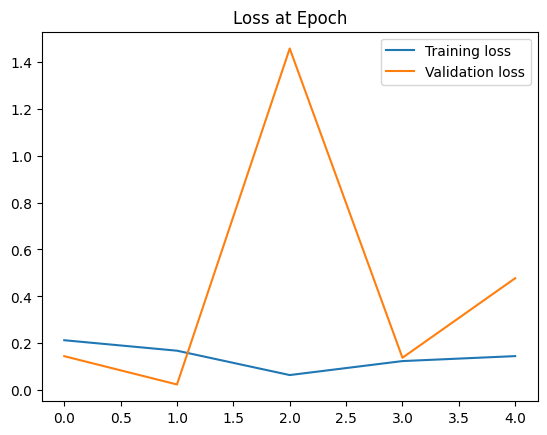

In [107]:
#train_losses = [tl.item() for tl in train_losses]
#test_losses = [tl.item() for tl in test_losses]

plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.title("Loss at Epoch")
plt.legend()

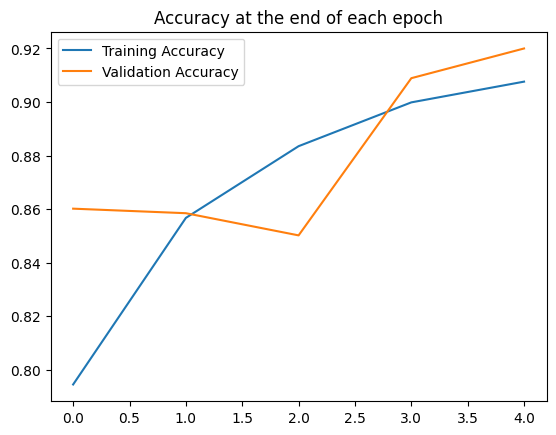

In [114]:
#train_correct = [tl.item() for tl in train_correct]
#test_correct = [tl.item() for tl in test_correct]

plt.plot([t / len(train_data) for t in train_correct], label = "Training Accuracy")
plt.plot([t / len(test_data) for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [137]:
y_testing = []
y_predicted = []

with torch.no_grad():
  correct = 0
  for X_test, y_test in test_loader:
    y_pred = Model(X_test.to(device))
    predicted = torch.max(y_pred, 1)[1]

    for i in predicted:
      y_predicted.append(i.to("cpu"))

    for i in y_test:
      y_testing.append(i.to("cpu"))

    correct += (predicted == y_test.to(device)).sum()

In [138]:
# Accuracy
print(f"Accuracy : {correct.item() / len(test_data) * 100}%")

Accuracy : 91.99645826917154%


In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [140]:
print(f"Precision : {precision_score(y_testing, y_predicted)}")
print(f"Recall : {recall_score(y_testing, y_predicted)}")
print(f"F1 Score : {f1_score(y_testing, y_predicted)}")

Precision : 0.9186422413793104
Recall : 0.897132333596422
F1 Score : 0.9077598828696926


### **Saving The Model**

In [141]:
torch.save(Model.state_dict(), "AirlinePassengerSatisfaction_ANN_Model.pt")